In [140]:
import pandas
import numpy
import matplotlib.pyplot as plt

import os
import scipy

import sklearn
import sklearn.feature_selection
import sklearn.ensemble

import fnmatch

import graphviz
import mpl_toolkits.mplot3d as plt3dd

import seaborn

import time

In [308]:
path_gdp = r".\Data\Africa_GDP.csv";

In [309]:
gdp_df = pandas.read_csv(path_gdp);
gdp_df.set_index("Year", inplace=True);
countries_list = gdp_df.columns;

GDP_growth_perc = "_diffGrowthGPD";

In [324]:
gdp_df_preproc = pandas.DataFrame(index=gdp_df.index, columns=countries_list.append(countries_list + GDP_growth_perc));

In [325]:
gdp_preproc_df = pandas.DataFrame(); 

for country in countries_list:
    # print(colName)
    gdp_preproc_df[country + GDP_growth_perc] = gdp_df[country].diff() / gdp_df[country]
    # gdp_preproc_df["ln_" + country] = numpy.log(gdp_df[country])
gdp_preproc_df    

,Algeria_diffGrowthGPD,Benin_diffGrowthGPD,Botswana_diffGrowthGPD,Burkina Faso_diffGrowthGPD,Burundi_diffGrowthGPD,Cameroon_diffGrowthGPD,Central African Republic_diffGrowthGPD,Chad_diffGrowthGPD,Eswatini_diffGrowthGPD,Ethiopia_diffGrowthGPD,...,Seychelles_diffGrowthGPD,Sierra Leone_diffGrowthGPD,Somalia_diffGrowthGPD,South Africa_diffGrowthGPD,Sudan_diffGrowthGPD,Tanzania_diffGrowthGPD,Togo_diffGrowthGPD,Uganda_diffGrowthGPD,Zambia_diffGrowthGPD,Zimbabwe_diffGrowthGPD
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,-0.118644,0.040195,0.075714,0.056544,0.034483,0.059088,0.089162,0.061060,0.184753,0.041852,...,-0.036232,0.017769,0.058437,0.051745,0.078910,0.061726,0.041682,0.041936,-0.024005,0.039809
1962,-0.216495,0.003243,0.076935,0.077246,0.049180,0.059734,0.010830,0.066158,0.063184,0.038171,...,0.083056,0.043437,0.058330,0.059914,0.079351,0.088797,0.044171,0.016678,-0.004534,0.018750
1963,0.259542,0.068889,0.064236,0.036731,0.082707,0.033513,0.037845,0.038011,0.151516,0.042460,...,0.092006,0.016713,0.058359,0.095834,0.017003,0.102700,0.076914,0.130070,0.035579,0.036145
1964,0.070922,0.058896,0.084690,0.039679,0.107383,0.075104,0.089040,0.052213,0.166990,0.080171,...,0.095498,0.062663,0.058310,0.092155,0.026686,0.077961,0.137554,0.123772,0.143805,0.047346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,-0.005655,0.008916,-0.018297,0.008903,-0.035188,-0.007255,0.000145,0.006698,-0.038114,0.121396,...,0.045153,-0.002094,0.121249,-0.040919,0.000133,0.065922,-0.005234,0.068494,-0.128829,-0.564479
2020,-0.173388,0.082620,-0.118020,0.095469,0.027611,0.027113,0.045308,-0.055953,-0.128830,0.109099,...,-0.351624,-0.003365,-0.023499,-0.150873,-0.196174,0.076315,0.055077,0.059899,-0.285090,-0.014995
2021,0.114847,0.113123,0.202158,0.097650,0.045435,0.093798,0.075413,0.090372,0.179063,0.032392,...,0.070350,0.043850,0.064497,0.194771,0.210196,0.064919,0.112914,0.072278,0.179154,0.241848


In [313]:
scaler = sklearn.preprocessing.StandardScaler();
ml_model = sklearn.linear_model.LinearRegression(n_jobs=3);

pipe = sklearn.pipeline.make_pipeline(scaler, ml_model);

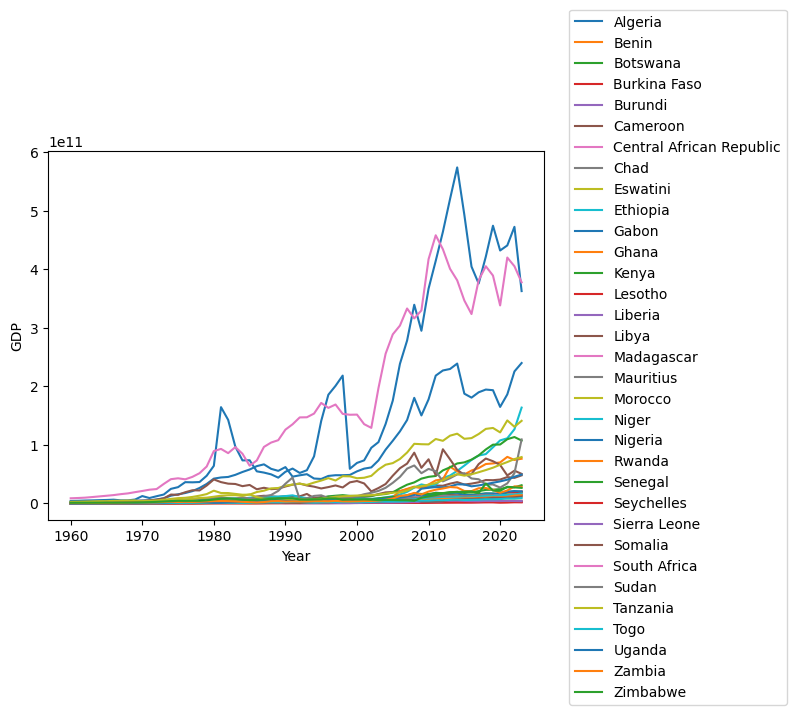

In [314]:
plt.figure()

for col in countries_list:
    plt.plot(gdp_df[col ], label=col);

plt.ylabel("GDP");
plt.xlabel("Year");
plt.legend(loc=[1.05, -0.50]);

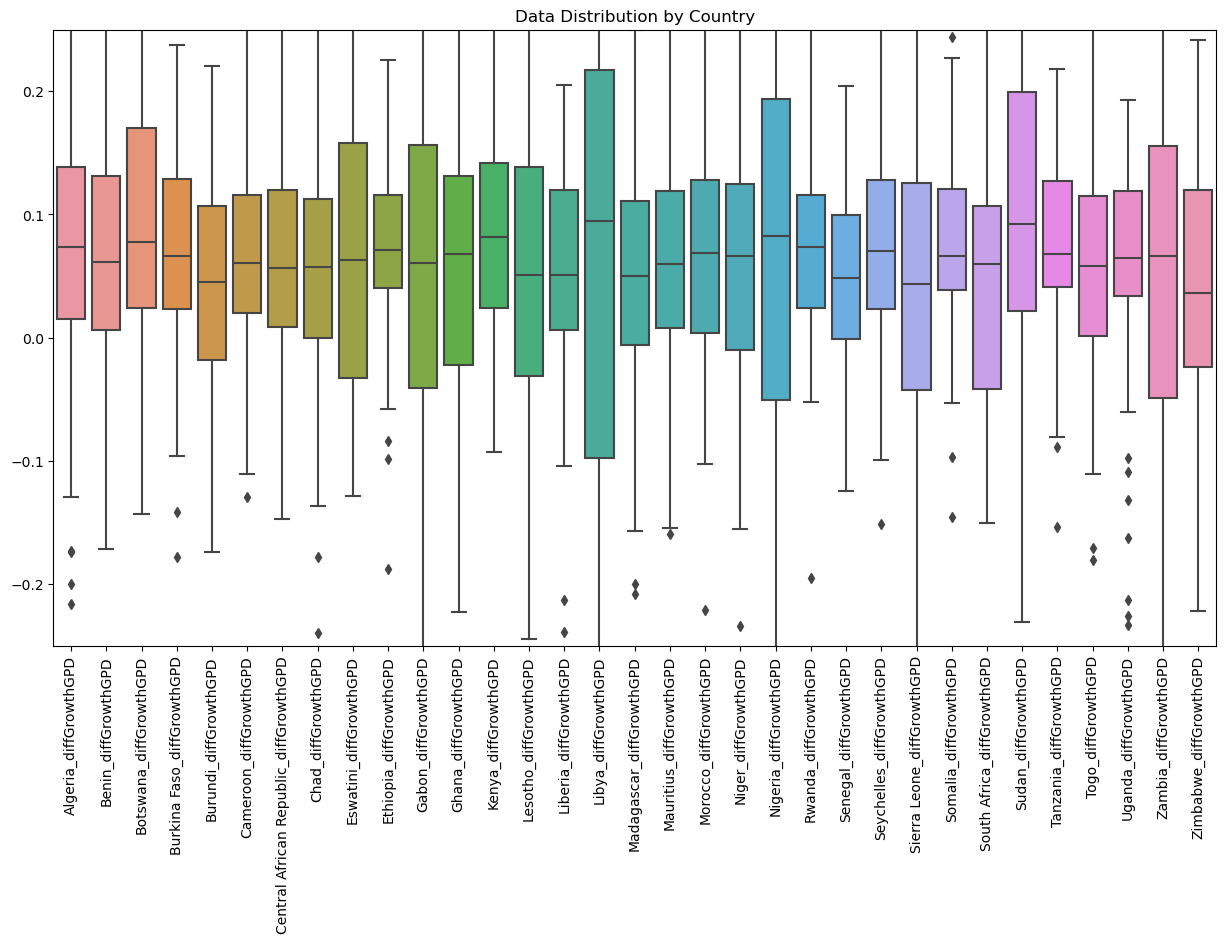

In [323]:
plt.figure(figsize=(15, 8));
seaborn.boxplot(gdp_preproc_df);
plt.xticks(rotation=90)
plt.title("Data Distribution by Country")
plt.ylim([-0.25,0.25])
plt.show()